In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.integrate import quad
from functools import partial
from scipy.fftpack import fft, ifft
from scipy.interpolate import interp1d
import mpl_toolkits.mplot3d.axes3d as plt_3d
import warnings
warnings.filterwarnings('ignore')

# Pricing Theory based on Fourier Transform Methods

<font size=5 >*1. General Instructions*</font>

In the past, I not only introduced "Black-Scholes-Merton" model, but implemented it to price Vanilla European option without dividend. 


And now, I still want to introduce another good method that can also be used under risk-neutral measure with a high universality.  


It's called "Fourier Transform Methods".

Compared with other methods, it has three advantages：
- More common: As long as we know the characteristic function of the random process generating the uncertainty, we can use this method. For most of stochastic processes, we don't know their probability density function(PDF), but we can get their characteristic function with more easy ways

- More accurate: It is based on high-precision numerical solutions, which can reduce computational costs compared to simulation methods

- More quickly: It takes less time than other methods

In this section, I will introduce some theoretical basics about Fourier Transform and its practical application in option pricing. If you want to know more, I hope you can continue to learn in the future.

<font size=5 >*2. Fourier Transform*</font>
## 2.1 Defination
### a) Fourier Transform
In the continuous environment, we can define the Fourier Transform of the integrable function _$f(x)$_ as
$$\hat{f}(u) \equiv \int_{-\infty}^{\infty}e^{iux}f(x){\rm d}x$$

u is a real or complex number, $e^{iux}$ is called the phase factor.
- If u is a real number, we can get $f(x)$ according to the Inversion theorem:
$$f(x)= \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{-iux}\hat {f}(u){\rm d}u $$

- If u is a complex number,
$$f(x) = \frac{1}{2\pi}\int_{-\infty +iu_{i}}^{\infty+iu_{i}}e^{-iux}\bar {f}(u){\rm d}u $$
with $u = u_{r} + iu_{i}$

Denote the inner product of two complex-valued, square-integrable functions f,g as <f, g>
$$<f,g> \equiv \int_{-\infty}^{\infty}f(x)\overline{g(x)}{\rm d}x$$

with $\bar{u}$ represent conjugate of a complex numbe u, that is $u = u_{r} + iu_{i}$ and $\bar{u} = u_{r} - iu_{i}$ 

### b) Parseval's theorem
According to the Inverse Fourier Transform, we can conclude that:

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\space <f,g>= \int_{-\infty}^{\infty}f(x)\bar{g(x)}{\rm d}x$  
$$=\int_{-\infty}^{\infty}\frac{1}{2\pi}\int_{-\infty}^{\infty}e^{-iux}\hat{f}(k){\rm d}k{\overline{g(x)}}{\rm d}x$$  
$$=\frac{1}{2\pi}\int_{-\infty}^{\infty}\hat{f}(k)\int_{-\infty}^{\infty}e^{-iux}\overline{g(x)}{\rm d}x{\rm d}k$$  
$$=\frac{1}{2\pi}\int_{-\infty}^{\infty}\hat{f}(k)\int_{-\infty}^{\infty}\overline{e^{-iux}g(x)}{\rm d}x{\rm d}k$$  
$$=\frac{1}{2\pi}\int_{-\infty}^{\infty}\hat{f}(k)\int_{-\infty}^{\infty}\overline{e^{-iux}g(x)}{\rm d}x{\rm d}k$$  
$\qquad\quad\space\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad=\frac{1}{2\pi}\int_{-\infty}^{\infty}\hat{f}(k)\overline{\hat g(k)}{\rm d}k$  

$\qquad\quad\space\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad=\frac{1}{2\pi}<\hat {f},\hat{g}>$  

### c) Characteristic Function
Suppose random variables x has a PDF $\phi x$, and the characteristic function of x is the fourier transform of $\phi x$


Charcateristic function:
$$\hat\phi (x) \equiv \int_{-\infty}^{\infty} e^{iux}\phi (x) {\rm d}x = E^{Q}[e^{iuX}]$$

There are some properties:
- $\hat\phi (x)$ always exists. Because $|\int_{-\infty}^{\infty}e^{iux}\phi (x) {\rm d}x| < \int_{-\infty}^{\infty}|e^{iux}\phi (x)| {\rm d}x < \infty $
- $\overline{\hat\phi (x)} = \hat\phi (-x)$

## 2.2 Option Pricing Theorem

The pricing theorem based on Fourier Transform is the application of Parseval's theorem under risk-neutral measure.  

Assume the profit of European call option is $C_T \equiv max[e^s - K, 0]$, with s $\equiv logS$
### a) Transformation of Call option (Lewis)
For $u = u_r + iu_i$ with $u_i > 1$, the Fourier Transformation of $C_T$ is:  
$$\hat C_T(u) = \int_{-\infty}^{\infty}e^{ius} max[e^s - K, 0] {\rm d}s$$
$$= \int_{log K}^{\infty}e^{ius}(e^s - K){\rm d}s  $$
$$= \int_{log K}^{\infty}\biggl( e^{(iu + 1)s} - Ke^{ius} \biggr) {\rm d}s$$
$$=\biggr ( \frac{e^{(iu + 1)s}}{iu + 1} - K\frac{e^{ius}}{iu}\biggr) {\bigg |}_{logK}^{\infty} $$
$$=-\frac{k^{iu +1}}{u^2-iu}$$  

According to the Inverse Fourier Transform, we can get: 

$$C_T(s)= \frac{1}{2\pi}\int_{-\infty +iu_{i}}^{\infty+iu_{i}}e^{-ius}\hat {C_T}(u){\rm d}u $$

so, $$C_0 = e^{-rT}E^{Q}_{0}(C_T)$$
$$=\frac{e^{-rT}}{2\pi}E^{Q}_{0}(\int_{-\infty +iu_{i}}^{\infty+iu_{i}}e^{-ius}\hat {C_T}(u){\rm d}u) $$
$$=\frac{e^{-rT}}{2\pi}\int_{-\infty +iu_{i}}^{\infty+iu_{i}}E^{Q}_{0}(e^{i(-u)s})\hat {C_T}(u){\rm d}u $$
$$=\frac{e^{-rT}}{2\pi}\int_{-\infty +iu_{i}}^{\infty+iu_{i}}\hat\phi (x)\hat {C_T}(u){\rm d}u$$

If $S_t \equiv S_0e^{rt+X_t}$  and $X_t$ is a Levy process with a martingale process $e^{X_t}$ that $X_0 = 0$.

So $\hat\phi(-u) = e^{-iuy}\varphi(-u)$, recall that $\varphi$ is the Characteristic function of $X_T$ and $y \equiv logS_0 + rT$and $k = log(S_0/K) + rT$
$$C_0 =\frac{e^{-rT}}{2\pi}\int_{-\infty +iu_{i}}^{\infty+iu_{i}}e^{-iuy}\varphi (-u)\hat {C}(u){\rm d}u $$
$$=-\frac{Ke^{-rT}}{2\pi}\int_{-\infty +iu_{i}}^{\infty+iu_{i}}e^{-iuk}\varphi (-u)\frac{{\rm d}u}{u^2-ui}$$

Suppose $u_i\in(0,1)$,the present value of call option is:
$$C_0 = S_0 -\frac{Ke^{-rT}}{2\pi}\int_{-\infty +iu_{i}}^{\infty+iu_{i}}e^{-iuk}\varphi (-u)\frac{{\rm d}u}{u^2-ui} $$

if we set $u_i = 0.5$, we can conclude

$$C_0 = S_0 -\frac{\sqrt{S_0K}e^{-rT/2}}{\pi}\int_{0}^{\infty}Re[e^{izk}\varphi (z-\frac{i}{2})]\frac{{\rm d}z}{z^2+\frac{1}{4}}$$

where Re[x] is the real part of x

### b) Transformation of Call option (Carr-Madan)

Suppose the profit of European Call option, $C_T \equiv max[S_T - K, 0]$, given $K \equiv e^k$ and $S_T \equiv e^s$
$$C_0 \equiv e^{-rT}E^{Q}_{0}\biggl(max[e^s-e^k,0]\biggr)$$
$$= e^{-rT}\int_{k}^{\infty}(e^s-e^k) \phi(s){\rm d}s$$  
$\phi(s)$ is the PDF of $s_T$ under the risk-neutral measure. Suppose $c_0 \equiv e^(\alpha k)C_0$, and the fourier transform of $c_0$ is
$$\psi(v) \equiv \int_{-\infty}^{\infty}e^{ivk}c_0{\rm d}k$$
and the inverse fourier transformation is
$$C_0 = \frac{e^{-\alpha k}}{\pi}\int_{0}^{\infty}e^{-ivk}\psi(v){\rm d}v$$

# 3. Numeric Methods

Apart from the methods I introduced before, we can also use another numieric methods to calculate the price of European Call option. Now, I will tell you a good algorithm, Fast Fourier Transform, to compute the price of a large number of options with the same maturity and can reduce the computational cost.

FFT is an algorithm that can be used to compute sums of the form like
$$w(u) = \sum_{j=1}^{N} e^{-i\frac{2\pi}{N}(j-1)(u-1)}x(j), u = 1,...,N$$

Given $v_j \equiv \eta(j-1)$, and the equation $C_0 = \frac{e^{-\alpha k}}{\pi}\int_{0}^{\infty}e^{-ivk}\psi(v){\rm d}v$ can be approximated by the following formula
$$C_0 = \frac{e^{-\alpha k}}{\pi}\int_{0}^{\infty}e^{-ivk}\psi(v){\rm d}v$$
$$ \approx \frac{e^{-\alpha k}}{\pi} \sum_{j=1}^{N} e^{-iv_jk}\psi(v_j)\eta$$

Suppose $\epsilon$ is a constant interval parameter, and considering the log strike price sequence $k_u = -b +\epsilon(u-1)$. Considering the interval $[-b, b]$ and set $b = 0.5N_{\epsilon}$ is the log strike price, FFT algorithm can calculate N numbers.  

And $$C_0 \approx \frac{e^{-\alpha k}}{\pi} \sum_{j=1}^{N} e^{-iv_j(-b+\epsilon(u-1))}\psi(v_j)\eta, u = 1,...,N$$
$$=\frac{e^{-\alpha k}}{\pi} \sum_{j=1}^{N} e^{-i\epsilon\eta(j-1)(u-1)}e^{ibv_j}\psi(v_j)\eta, u = 1,...,N$$

Then we need to use Simpson's law, and the call price is approximated by:
$$\begin{cases}C_0 \approx \frac{e^{-\alpha k_u}}{\pi} \sum_{j=1}^{N} e^{-i\frac{2\pi}{N}(j-1)(u-1)}e^{ibv_j}\psi(v_j)\frac{\eta}{3}\biggl(3+(-1)^{j}-\mathbb I_{j-1}\biggr), u = 1,...,N\\
\mathbb I_{j-1}\begin{cases}1,n=0\\0,otherwise\end{cases}\end{cases}$$

# 4. Characteristic Function
In this part, I will tell you some characteristic functions given the well-known distribution we often used :

##### Normal:
$\mathcal{N}(\mu,\sigma^2)$, $\sigma>0$.
$$ \phi_N(u) = e^{i\mu u - \frac{1}{2}\sigma^2 u^2} $$
##### Gamma (shape-scale parameterization) 
$\Gamma(a,b)$, $a,b >0$.
$$ \phi_G(u) = (1-ibu)^{-a} $$
##### Poisson
$Po(\lambda)$, $\lambda>0$.
$$ \phi_P(u) = e^{\lambda (e^{iu}-1)} $$

We can check them accoring to the General Fourier inversion formula (Gil-Pelaez)

In [4]:
def Gil_Pelaez_pdf(x, cf, right_lim):               
    integrand = lambda u: np.real( np.exp(-u*x*1j) * cf(u) )
    return 1/np.pi * quad(integrand, 1e-15, right_lim )[0]
def cf_normal(u, mu=1, sig=2):
    return np.exp( 1j * u * mu - 0.5 * u**2 * sig**2 )
def cf_gamma(u, a=1, b=2):
    return (1 - b * u * 1j)**(-a) 
def cf_poisson(u, lam=1):
    return np.exp( lam * (np.exp(1j * u) -1) ) 


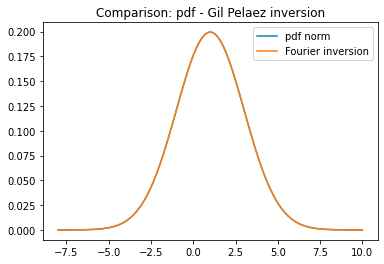

In [5]:
x = np.linspace(-8,10,100)
plt.plot(x,ss.norm.pdf(x, loc=1, scale=2), label="pdf norm")
plt.plot(x,[Gil_Pelaez_pdf(i,cf_normal,np.inf) for i in x], label="Fourier inversion" )
plt.title("Comparison: pdf - Gil Pelaez inversion"); plt.legend()
plt.show()

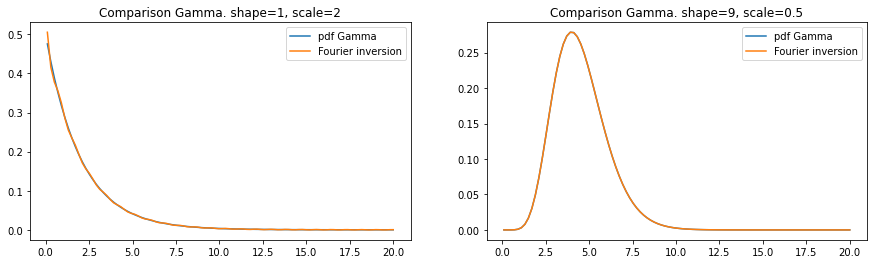

In [6]:
xx = np.linspace(0.1,20,100)
a = 1     #shape parameter
b = 2     #scale parameter
c = 9     #shape parameter
d = 0.5   #scale parameter
lim_ab = 24
lim_cd = np.inf
cf_gamma_ab = partial(cf_gamma, a=a, b=b)   # function binding 
cf_gamma_cd = partial(cf_gamma, a=c, b=d)   # function binding 

fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.plot(xx,ss.gamma.pdf(xx, a, scale=b), label="pdf Gamma")
ax1.plot(xx,[Gil_Pelaez_pdf(i,cf_gamma_ab, lim_ab) for i in xx], label="Fourier inversion" )
ax1.set_title("Comparison Gamma. shape=1, scale=2"); ax1.legend()
ax2.plot(xx,ss.gamma.pdf(xx,c, scale=d), label="pdf Gamma")
ax2.plot(xx,[Gil_Pelaez_pdf(i,cf_gamma_cd, lim_cd) for i in xx], label="Fourier inversion" )
ax2.set_title("Comparison Gamma. shape=9, scale=0.5"); ax2.legend()
plt.show()

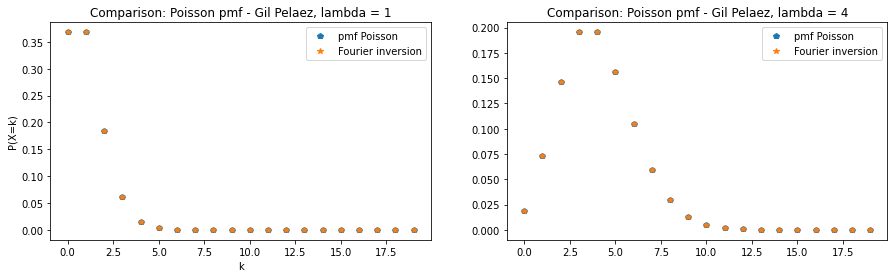

In [7]:
k = np.array(range(20))
lam = 4
cf_poisson4 = partial(cf_poisson, lam=lam)   # function binding to lam=4

fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.plot(k, ss.poisson.pmf(k, 1), linestyle="None", marker='p', label="pmf Poisson")  # with lam=1 
ax1.plot(k, [Gil_Pelaez_pdf(i,cf_poisson, np.pi) for i in k], \
         linestyle="None", marker='*', label="Fourier inversion" )      # lam=1 by default
ax1.set_xlabel("k"); ax1.set_ylabel("P(X=k)")
ax1.set_title("Comparison: Poisson pmf - Gil Pelaez, lambda = 1"); ax1.legend()
ax2.plot(k, ss.poisson.pmf(k, lam), linestyle="None", marker='p', label="pmf Poisson")
ax2.plot(k, [Gil_Pelaez_pdf(i,cf_poisson4, np.pi) for i in k], \
         linestyle="None", marker='*', label="Fourier inversion" )
ax2.set_title("Comparison: Poisson pmf - Gil Pelaez, lambda = 4"); ax2.legend()
plt.show()

# 5. Sample Code

In [19]:
def BSM_Call_Lewis(S0,K,T,r,sigma):
    value = quad(lambda u: BSM_integral(u,S0,K,T,r,sigma),0,100)[0]
    call = max(0, S0 - np.exp(-r*T)*np.sqrt(S0*K)/np.pi*value)
    return call

def BSM_integral(u, S0, K,T,r,sigma):
    cf_value=BSM_characteristic(u-1j*0.5,0,T,r,sigma)
    int_value=1/(u**2+0.25)*(np.exp(1j*u*np.log(S0/K))*cf_value).real
    return int_value
def BSM_characteristic(v, x0, T,r,sigma):
    ret = np.exp(((x0/T + r - 0.5*sigma**2)*1j*v-0.5*sigma**2*v**2)*T)
    return ret

def FFT(K, S0, cf, interp="cubic"):
    """ 
    K = vector of strike
    S = spot price scalar
    cf = characteristic function
    interp can be cubic or linear
    """
    N=2**12                          # FFT more efficient for N power of 2
    B = 200                          # integration limit 
    dx = B/N
    x = np.arange(N) * dx            # the final value B is excluded

    weight = np.arange(N)            # Simpson weights
    weight = 3 + (-1)**(weight+1)
    weight[0] = 1; weight[N-1]=1

    dk = 2*np.pi/B
    b = N * dk /2
    ks = -b + dk * np.arange(N)

    integrand = np.exp(- 1j * b * np.arange(N)*dx) * cf(x - 0.5j) * 1/(x**2 + 0.25) * weight * dx/3
    integral_value = np.real( ifft(integrand)*N )
    
    if interp == "linear":
        spline_lin = interp1d(ks, integral_value, kind='linear')
        prices = S0 - np.sqrt(S0 * K) * np.exp(-r*T)/np.pi * spline_lin( np.log(S0/K) )
    elif interp == "cubic":
        spline_cub = interp1d(ks, integral_value, kind='cubic')
        prices = S0 - np.sqrt(S0 * K) * np.exp(-r*T)/np.pi * spline_cub( np.log(S0/K) )
    return prices


def BSM_call_value_FFT(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model via Lewis (2001)
    --> Fourier-based approach (integral).
    Parameters
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        time-to-maturity (for t=0)
    r: float
        constant risk-free short rate
    sigma: float
        volatility factor in diffusion term
    Returns
    =======
    call_value: float
        European call option present value
    '''
    k = np.log(K / S0)
    x0 = np.log(S0 / S0)
    g = 1  # factor to increase accuracy
    N = g * 4096
    eps = (g * 150.) ** -1
    eta = 2 * np.pi / (N * eps)
    b = 0.5 * N * eps - k
    u = np.arange(1, N + 1, 1)
    vo = eta * (u - 1)
    # Modificatons to Ensure int_valueegrability
    if S0 >= 0.95 * K:  # ITM case
        alpha = 1.5
        v = vo - (alpha + 1) * 1j
        modcharFunc = np.exp(-r * T) * (BSM_characteristic(
            v, x0, T, r, sigma) /
            (alpha ** 2 + alpha - vo ** 2 + 1j * (2 * alpha + 1) * vo))
    else:        # OTM case
        alpha = 1.1
        v = (vo - 1j * alpha) - 1j
        modcharFunc1 = np.exp(-r * T) * (1 / (1 + 1j * (vo - 1j * alpha)) -
                             np.exp(r * T) / (1j * (vo - 1j * alpha)) -
                             BSM_characteristic(v, x0, T, r, sigma) /
                             ((vo - 1j * alpha) ** 2 -
                              1j * (vo - 1j * alpha)))
        v = (vo + 1j * alpha) - 1j
        modcharFunc2 = np.exp(-r * T) * (1 / (1 + 1j * (vo + 1j * alpha))
                             - np.exp(r * T) /
                             (1j * (vo + 1j * alpha))
                             - BSM_characteristic(
            v, x0, T, r, sigma) /
            ((vo + 1j * alpha) ** 2 - 1j * (vo + 1j * alpha)))
    # Numerical FFT Routine
    delt = np.zeros(N, dtype=np.float)
    delt[0] = 1
    j = np.arange(1, N + 1, 1)
    SimpsonW = (3 + (-1) ** j - delt) / 3
    if S0 >= 0.95 * K:
        FFTFunc = np.exp(1j * b * vo) * modcharFunc * eta * SimpsonW
        payoff = (fft(FFTFunc)).real
        CallValueM = np.exp(-alpha * k) / np.pi * payoff
    else:
        FFTFunc = (np.exp(1j * b * vo) *
                   (modcharFunc1 - modcharFunc2) *
                   0.5 * eta * SimpsonW)
        payoff = (fft(FFTFunc)).real
        CallValueM = payoff / (np.sinh(alpha * k) * np.pi)
    pos = int((k + b) / eps)
    CallValue = CallValueM[pos] * S0
    # klist = np.exp((np.arange(0, N, 1) - 1) * eps - b) * S0
    return CallValue  # , klist[pos - 50:pos + 50]


In [12]:
BSM_Call_Lewis(100,100,1,0.05,0.2)

10.450583572184797

In [16]:
r=0.05
sig=0.2
T=1
cf_GBM = partial(cf_normal, mu=( r - 0.5 * sig**2 )*T, sig=sig*np.sqrt(T)) 
FFT(100,100,cf_GBM,'cubic')

10.450583572186233

In [20]:
BSM_call_value_FFT(100, 100, 1, 0.05, 0.2)

10.450583529672013